In [ ]:
# Môi trường lập trình
from google.colab import drive
drive.mount("/content/gdrive")
folder = '/content/gdrive/My Drive/Colab Notebooks/DATASET_DAP/Output'

Mounted at /content/gdrive


### 1. **File và Thư viện**

In [ ]:
!pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 3.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from prince import MCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Tải file
!gdown --id 1A271yn-q4MlUqfJiifX7lwjTiX5ATNkj

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1A271yn-q4MlUqfJiifX7lwjTiX5ATNkj
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 147MB/s]


In [ ]:
# Đọc dữ liệu từ file CSV
df_raw = pd.read_csv('/content/weatherAUS.csv')
df_raw.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### 2. **Tiền xử lý dữ liệu**

#### 2.1. ***EDA (thăm dò dữ liệu)***

##### 2.1.1. Data Exploration

Sao chép data sang bộ dữ liệu khác để tiến hành phân tích

In [ ]:
df = df_raw.copy()

Xem dimension của bộ dữ liệu

In [ ]:
num_rows, num_columns = df.shape
print(f'Dữ liệu có {num_rows} dòng quan sát và {num_columns} cột thuộc tính.')

Dữ liệu có 145460 dòng quan sát và 23 cột thuộc tính.


Kiểm tra tên các thuộc tính, số lượng giá trị duy nhất, số lượng giá trị null, kiểu dữ liệu của thuộc tính đó.

In [ ]:
def value_check(dataframe):
    dataframe_check = pd.DataFrame({
        'Count': dataframe.count(),
        'Unique': dataframe.nunique(),
        'Null': dataframe.isnull().sum(),
        '%Null': (dataframe.isnull().sum() / len(dataframe)) * 100,
        'DType': dataframe.dtypes.values
    })
    dataframe_check['%Null'] = dataframe_check['%Null'].map('{:.2f}%'.format)
    return dataframe_check.style

In [ ]:
value_check(df)

,Count,Unique,Null,%Null,DType
Date,145460,3436,0,0.00%,object
Location,145460,49,0,0.00%,object
MinTemp,143975,389,1485,1.02%,float64
MaxTemp,144199,505,1261,0.87%,float64
Rainfall,142199,681,3261,2.24%,float64
Evaporation,82670,358,62790,43.17%,float64
Sunshine,75625,145,69835,48.01%,float64
WindGustDir,135134,16,10326,7.10%,object
WindGustSpeed,135197,67,10263,7.06%,float64
WindDir9am,134894,16,10566,7.26%,object


In [ ]:
# Đếm tổng số lượng giá trị null
null_count = df.isnull().sum().sum()
print(f"Số lượng giá trị null trong dataset là: {null_count}")

Số lượng giá trị null trong dataset là: 343248


Xem giá trị thống kê của các biến trong bộ dữ liệu

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


##### 2.1.2. Kiểm tra tương quan

Tạo biến numeric của target từ biến categorical của target gốc là 'RainTomorrow' để sử dụng Correlation Heatmap

In [ ]:
rain_today = {'Yes': 1, 'No': 0}
df['RainToday'] = df['RainToday'].map(rain_today)
rain_tomorrow = {'Yes': 1, 'No': 0}
df['RainTomorrow'] = df['RainTomorrow'].map(rain_tomorrow)

In [ ]:
num_col = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation' ,'Sunshine', 'WindGustSpeed', 'WindSpeed9am',
           'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
           'Cloud3pm', 'Temp9am', 'Temp3pm']

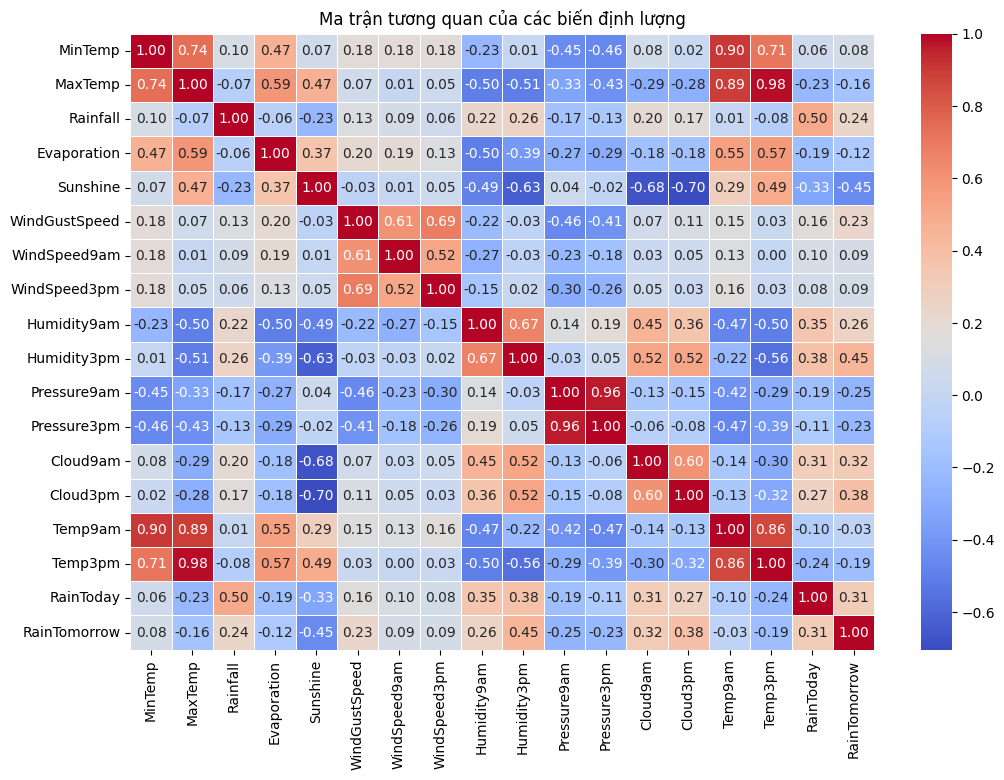

In [ ]:
# Chọn các biến dữ liệu số
numeric_vars = num_col + ['RainToday', 'RainTomorrow']

# Tạo một DataFrame mới chỉ chứa các biến dữ liệu số
numeric_data = df[numeric_vars]

# Tính ma trận tương quan
correlation_matrix = numeric_data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Ma trận tương quan của các biến định lượng')
plt.show()

#### 2.2. ***Data cleaning (làm sạch dữ liệu)***

##### 2.2.1. Xử lý kiểu dữ liệu thời gian

In [ ]:
datetime_col = ['Date']
for col in datetime_col:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d', errors='coerce')

# kiểm tra
df[datetime_col].dtypes

Date    datetime64[ns]
dtype: object

In [ ]:
# Kiểm tra format khi chuyển sang năm mới
df[datetime_col][29:33]

,Date
29,2008-12-30
30,2008-12-31
31,2009-01-01
32,2009-01-02


In [ ]:
# Hàm xác định thời gian invalid
def is_invalid_date(date_string):
    try:
        pd.to_datetime(date_string)
        return False
    except ValueError:
        return True

# Tạo một cột mới để xác định giá trị thời gian bất thường
invalid_date = df[datetime_col].applymap(is_invalid_date)

# Lọc các dòng có thời gian bất thường
invalid_data = df[invalid_date.any(axis=1)]
invalid_data = invalid_data[['Date', 'Location', 'RainTomorrow']]
print(invalid_data)

Empty DataFrame
Columns: [Date, Location, RainTomorrow]
Index: []


##### 2.2.2. Xử lý dữ liệu bị thiếu (missing values)

Xác định những dữ liệu có nhiều hơn 30% missing values

In [ ]:
# Xác định ngưỡng 30%
missing_threshold = 0.3 * len(df)
columns_with_missing_data = df.columns[df.isnull().sum() > missing_threshold]
print('Số lượng cột thuộc tính có hơn 30% dữ liệu bị thiếu:',
      f'{len(columns_with_missing_data)}')
print('Các cột thuộc tính có hơn 30% dữ liệu bị thiếu:')
for col in columns_with_missing_data:
    print(col)

Số lượng cột thuộc tính có hơn 30% dữ liệu bị thiếu: 4
Các cột thuộc tính có hơn 30% dữ liệu bị thiếu:
Evaporation
Sunshine
Cloud9am
Cloud3pm


Vì số lượng dữ liệu bị thiếu của các biến này quá lớn so với tổng thể lấy mẫu, ta sẽ xem xét có nên giữ lại cột đó để phân tích tiếp hay không bằng cách sử dụng độ tương quan và phương pháp kiểm định.

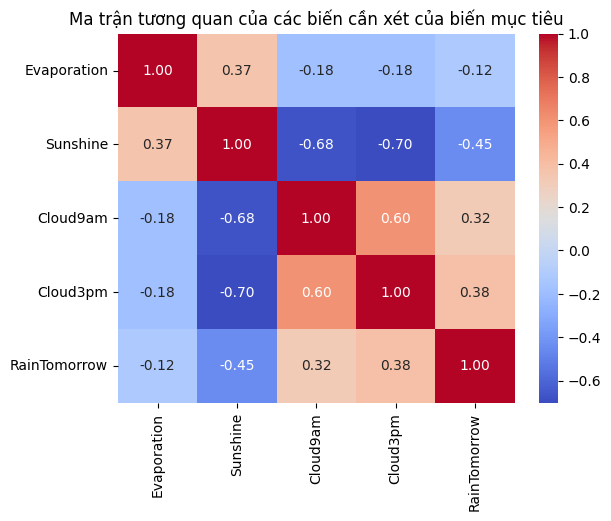

In [ ]:
# Các biến để quan sát tương quan
variables_of_interest = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

# Quan sát tương quan với 'RainTomorrow' thông qua biến Numeric của nó
correlation_with_rain_tomorrow = df[variables_of_interest + ['RainTomorrow']].corr()
sns.heatmap(correlation_with_rain_tomorrow, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan của các biến cần xét của biến mục tiêu')
plt.show()

**Với chỉ số tương quan với 'RainToday':**
- **Evaporation**: Chỉ số tương quan thấp với "RainTomorrow";
- **Sunshine**: Tương quan có độ mạnh trung bình đến mạnh;
- **Cloud9am** và **Cloud3pm**: Tương quan đều có độ mạnh trung bình.

Để chắc chắn hơn, ta sẽ đi kiểm định thống kê cho từng biến đó đối với biến target. Nhưng để có thể làm được, ta phải xử lý các giá trị null tạm thời cho bộ dữ liệu.

Đối với biến target, ta tách các dòng có giá trị null của 'RainTomorrow' ra khỏi dataframe và thêm vào dataframe khác để thực hiện mô hình dự đoán sau này.

In [ ]:
# tách null ra null_df
null_df = df[df['RainTomorrow'].isnull()].copy()

# xóa null khỏi df
df = df.dropna(subset=['RainTomorrow'])

Đối với biến Numeric, ta điền giá trị trung bình cho các điểm dữ liệu bị trống

In [ ]:
for col in num_col:
    df[col] = df[col].fillna(df[col].mean())

Đối với biến Categorical, ta sử dụng yếu vị để điền vào dữ liệu bị trống cho các cột

In [ ]:
df['RainToday'] = df['RainToday'].astype('object')
cate_col = df.select_dtypes(include=['object'])
for col in cate_col:
    df[col] = df[col].fillna(df[col].mode()[0])

Tiếp theo, ta kiểm định thống kê của từng biến đó đối với mỗi biến target.

In [ ]:
alpha = 0.05
nsided = 2
zscore = ss.norm.ppf(1-alpha/nsided)
zscore

1.959963984540054

> Kiểm định μ(Evaporation) và target μ(RainTomorrow)

In [ ]:
evaporation_rain_tomorrow = df[df['RainTomorrow'] == 1]['Evaporation']
evaporation_no_rain_tomorrow = df[df['RainTomorrow'] == 0]['Evaporation']

# tính sự khác biệt trung bình giữa hai nhóm
mean_difference = evaporation_rain_tomorrow.mean() - evaporation_no_rain_tomorrow.mean()
print(f'Mean Difference (Evaporation): {mean_difference:.2f}')

Mean Difference (Evaporation): -0.68


In [ ]:
# đo lường sự khác biệt của biến RainTomorrow
rain_tomorrow_counts = df['RainTomorrow'].value_counts()
print(f'RainTomorrow Counts:\n{rain_tomorrow_counts}')

# tính phần trăm sự khác biệt
percentage_difference = (rain_tomorrow_counts[0] - rain_tomorrow_counts[1]) / rain_tomorrow_counts.sum() * 100
print(f'Percentage Difference (RainTomorrow): {percentage_difference:.2f}%')

RainTomorrow Counts:
0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64
Percentage Difference (RainTomorrow): 55.16%


In [ ]:
asl_mean_dif = np.abs(mean_difference) # độ lệch chuẩn tuyệt đối của chênh lệch trung bình giữa hai nhóm.

if (asl_mean_dif > zscore):
    print(f'Vì {asl_mean_dif:.2f} > {zscore:.2f}',
          '\n=> Có sự khác biệt đáng kể giữa Evaporation của hai nhóm RainTomorrow.')
    if (mean_difference > 0):
        print('Nhóm RainTomorrow có trung bình Evaporation cao hơn.')
    else:
        print('Nhóm RainTomorrow có trung bình Evaporation thấp hơn.')
else:
    print(f'Vì {asl_mean_dif:.2f} < {zscore:.2f}',
          '\n=> Không có sự khác biệt đáng kể giữa Evaporation của hai nhóm RainTomorrow.')

Vì 0.68 < 1.96 
=> Không có sự khác biệt đáng kể giữa Evaporation của hai nhóm RainTomorrow.


> Kiểm định μ(Sunshine) và target μ(RainTomorrow)

In [ ]:
sunshine_rain_tomorrow = df[df['RainTomorrow'] == 1]['Sunshine']
sunshine_no_rain_tomorrow = df[df['RainTomorrow'] == 0]['Sunshine']
mean_difference = sunshine_rain_tomorrow.mean() - sunshine_no_rain_tomorrow.mean()
print(f'Mean Difference (Sunshine): {mean_difference:.2f}')

rain_tomorrow_counts = df['RainTomorrow'].value_counts()
print(f'RainTomorrow Counts:\n{rain_tomorrow_counts}')
percentage_difference = (rain_tomorrow_counts[0] - rain_tomorrow_counts[1]) / rain_tomorrow_counts.sum() * 100
print(f'Percentage Difference (RainTomorrow): {percentage_difference:.2f}%')

asl_mean_dif = np.abs(mean_difference)

if (asl_mean_dif > zscore):
    print(f'Vì {asl_mean_dif:.2f} > {zscore:.2f}\n=> Có sự khác biệt đáng kể giữa Sunshine của hai nhóm RainTomorrow.')
    if (mean_difference > 0):
        print('Nhóm RainTomorrow có trung bình Sunshine cao hơn.')
    else:
        print('Nhóm RainTomorrow có trung bình Sunshine thấp hơn.')
else:
    print(f'Vì {asl_mean_dif:.2f} < {zscore:.2f}\n=> Không có sự khác biệt đáng kể giữa Sunshine của hai nhóm RainTomorrow.')

Mean Difference (Sunshine): -2.14
RainTomorrow Counts:
0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64
Percentage Difference (RainTomorrow): 55.16%
Vì 2.14 > 1.96
=> Có sự khác biệt đáng kể giữa Sunshine của hai nhóm RainTomorrow.
Nhóm RainTomorrow có trung bình Sunshine thấp hơn.


> Kiểm định μ(Cloud9am) và target μ(RainTomorrow)

In [ ]:
cloud9am_rain_tomorrow = df[df['RainTomorrow'] == 1]['Cloud9am']
cloud9am_no_rain_tomorrow = df[df['RainTomorrow'] == 0]['Cloud9am']
mean_difference = cloud9am_rain_tomorrow.mean() - cloud9am_no_rain_tomorrow.mean()
print(f'Mean Difference (Cloud9am): {mean_difference:.2f}')

rain_tomorrow_counts = df['RainTomorrow'].value_counts()
print(f'RainTomorrow Counts:\n{rain_tomorrow_counts}')
percentage_difference = (rain_tomorrow_counts[0] - rain_tomorrow_counts[1]) / rain_tomorrow_counts.sum() * 100
print(f'Percentage Difference (RainTomorrow): {percentage_difference:.2f}%')

asl_mean_dif = np.abs(mean_difference)

if (asl_mean_dif > zscore):
    print(f'Vì {asl_mean_dif:.2f} > {zscore:.2f}\n=> Có sự khác biệt đáng kể giữa Cloud9am của hai nhóm RainTomorrow.')
    if (mean_difference > 0):
        print('Nhóm RainTomorrow có trung bình Cloud9am cao hơn.')
    else:
        print('Nhóm RainTomorrow có trung bình Cloud9am thấp hơn.')
else:
    print(f'Vì {asl_mean_dif:.2f} < {zscore:.2f}\n=> Không có sự khác biệt đáng kể giữa Cloud9am của hai nhóm RainTomorrow.')

Mean Difference (Cloud9am): 1.39
RainTomorrow Counts:
0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64
Percentage Difference (RainTomorrow): 55.16%
Vì 1.39 < 1.96
=> Không có sự khác biệt đáng kể giữa Cloud9am của hai nhóm RainTomorrow.


> Kiểm định μ(Cloud3pm) và target μ(RainTomorrow)

In [ ]:
cloud3pm_rain_tomorrow = df[df['RainTomorrow'] == 1]['Cloud3pm']
cloud3pm_no_rain_tomorrow = df[df['RainTomorrow'] == 0]['Cloud3pm']
mean_difference = cloud3pm_rain_tomorrow.mean() - cloud3pm_no_rain_tomorrow.mean()
print(f'Mean Difference (Cloud3pm): {mean_difference:.2f}')

rain_tomorrow_counts = df['RainTomorrow'].value_counts()
print(f'RainTomorrow Counts:\n{rain_tomorrow_counts}')
percentage_difference = (rain_tomorrow_counts[0] - rain_tomorrow_counts[1]) / rain_tomorrow_counts.sum() * 100
print(f'Percentage Difference (RainTomorrow): {percentage_difference:.2f}%')

asl_mean_dif = np.abs(mean_difference)

if (asl_mean_dif > zscore):
    print(f'Vì {asl_mean_dif:.2f} > {zscore:.2f}\n=> Có sự khác biệt đáng kể giữa Cloud3pm của hai nhóm RainTomorrow.')
    if (mean_difference > 0):
        print('Nhóm RainTomorrow có trung bình Cloud3pm cao hơn.')
    else:
        print('Nhóm RainTomorrow có trung bình Cloud3pm thấp hơn.')
else:
    print(f'Vì {asl_mean_dif:.2f} < {zscore:.2f}\n=> Không có sự khác biệt đáng kể giữa Cloud3pm của hai nhóm RainTomorrow.')

Mean Difference (Cloud3pm): 1.52
RainTomorrow Counts:
0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64
Percentage Difference (RainTomorrow): 55.16%
Vì 1.52 < 1.96
=> Không có sự khác biệt đáng kể giữa Cloud3pm của hai nhóm RainTomorrow.


In [ ]:
# không sử dụng 3 biến này, đợi thực hiện PCA để ra kết luận cuối cùng
num_col = [col for col in num_col if col not in ['Evaporation', 'Cloud9am', 'Cloud3pm']]

##### 2.2.3. Kiểm tra dữ liệu trùng lặp

In [ ]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


##### 2.2.4. Xử lý dữ liệu outliers

Sử dụng quy tắc 3-sigma để tìm outlier cho các biến định lượng

In [ ]:
print(f'{len(num_col)} biến: {num_col}')

13 biến: ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [ ]:
mean_values = df[num_col].mean()
std_values = df[num_col].std(ddof=1)
uplim_values = mean_values + 3 * std_values
lowlim_values = mean_values - 3 * std_values

outliers_3s = {}
for col in num_col:
    outliers_3s[col] = len(df[(df[col] > uplim_values[col])
                              | (df[col] < lowlim_values[col])])

In [ ]:
for col, count in outliers_3s.items():
    print(f'Cột {col}: {count} outliers')

Cột MinTemp: 25 outliers
Cột MaxTemp: 309 outliers
Cột Rainfall: 2409 outliers
Cột Sunshine: 0 outliers
Cột WindGustSpeed: 1673 outliers
Cột WindSpeed9am: 1309 outliers
Cột WindSpeed3pm: 934 outliers
Cột Humidity9am: 583 outliers
Cột Humidity3pm: 0 outliers
Cột Pressure9am: 763 outliers
Cột Pressure3pm: 651 outliers
Cột Temp9am: 138 outliers
Cột Temp3pm: 430 outliers


Sử dụng boxplot để trực quan các outliers

<Axes: >

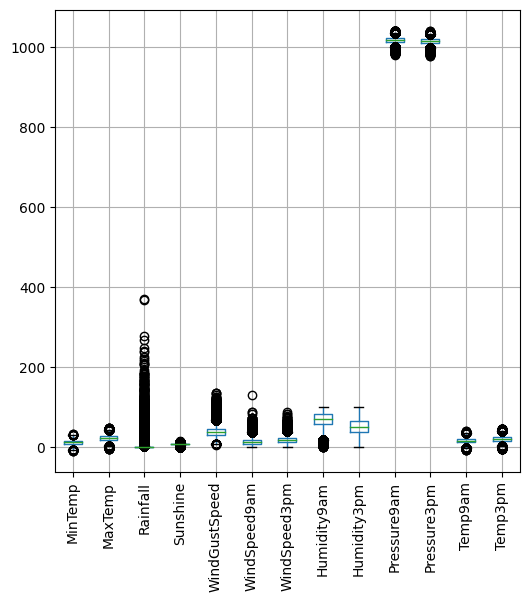

In [ ]:
# tất cả
plt.figure(figsize=(6, 6))
df.boxplot(num_col, rot = 90)

<Axes: >

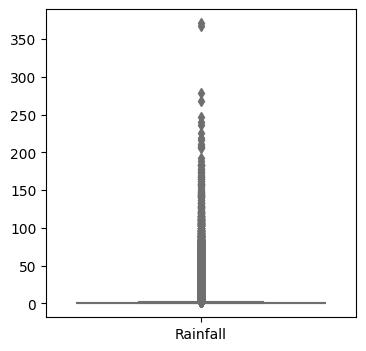

In [ ]:
# lượng mưa
num_col1 = ['Rainfall']
# boxplot
plt.figure(figsize=(4, 4))
sns.boxplot(data=df[num_col1], color=sns.xkcd_rgb['sky blue'])

<Axes: >

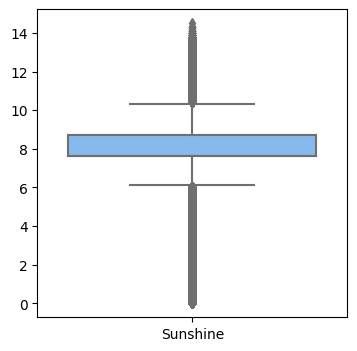

In [ ]:
# số giờ nắng
num_col2 = ['Sunshine']
# boxplot
plt.figure(figsize=(4, 4))
sns.boxplot(data=df[num_col2], color=sns.xkcd_rgb['sky blue'])

<Axes: >

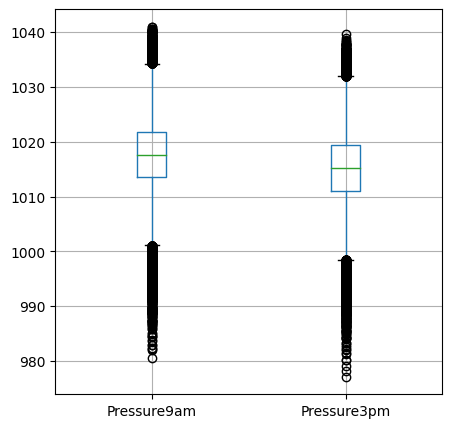

In [ ]:
# áp suất
num_col3 = ['Pressure9am', 'Pressure3pm']
# boxplot
plt.figure(figsize=(5, 5))
df.boxplot(num_col3)

<Axes: >

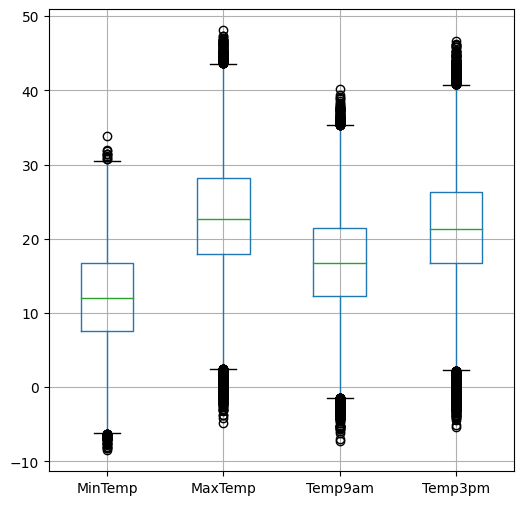

In [ ]:
# nhiệt độ
num_col4 = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
# boxplot
plt.figure(figsize=(6, 6))
df.boxplot(num_col4)

<Axes: >

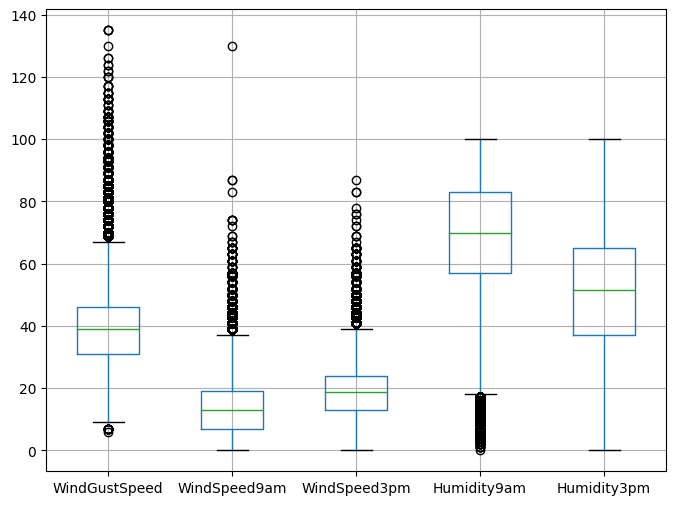

In [ ]:
# còn lại
remain_numcol = num_col1 + num_col2 + num_col3 + num_col4
num_col5 = [col for col in num_col if col not in remain_numcol]
# boxplot
plt.figure(figsize=(8, 6))
df.boxplot(num_col5)

In [ ]:
# sns.set(style='whitegrid')
# plt.figure(figsize=(10, 15))
# for i, col in enumerate(num_col, 1):
#     plt.subplot(8, 2, i)
#     sns.boxplot(x=df[col], color=sns.xkcd_rgb['sky blue'])
#     plt.title(f'Boxplot {col}')
# plt.tight_layout()
# plt.show()

Loại bỏ Outliers dựa trên index của Outliers vừa có

In [ ]:
for col in num_col:
    mean = df[col].mean()
    std = df[col].std(ddof=1)
    uplim = mean + 3 * std
    lowlim = mean - 3 * std
    outliers_col = df[col][(df[col] < lowlim) | (df[col] > uplim)]
    index_outliers_col = list(outliers_col.index)
    df.drop(index_outliers_col, axis=0, inplace=True)

<Axes: >

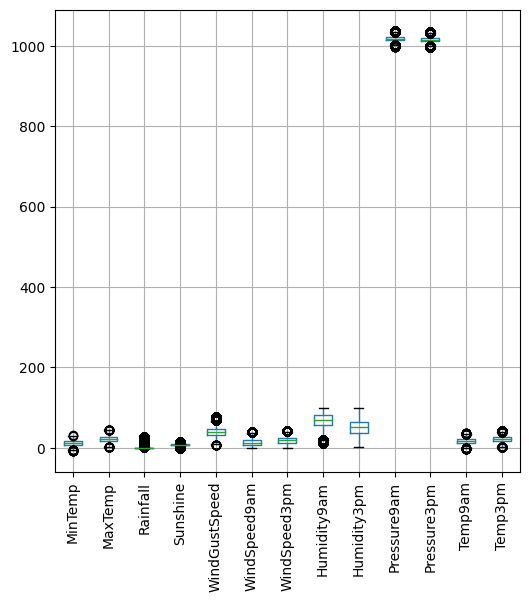

In [ ]:
# tất cả
plt.figure(figsize=(6, 6))
df.boxplot(num_col, rot = 90)

<Axes: >

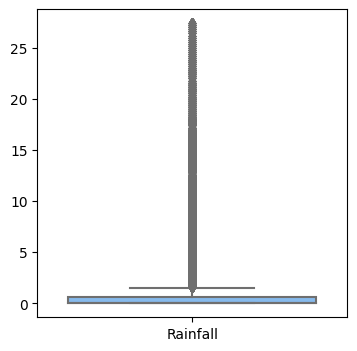

In [ ]:
# lượng mưa
num_col1 = ['Rainfall']
# boxplot
plt.figure(figsize=(4, 4))
sns.boxplot(data=df[num_col1], color=sns.xkcd_rgb['sky blue'])

<Axes: >

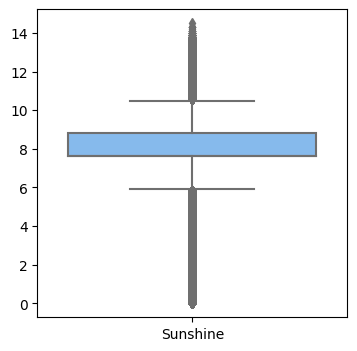

In [ ]:
# số giờ nắng
num_col2 = ['Sunshine']
# boxplot
plt.figure(figsize=(4, 4))
sns.boxplot(data=df[num_col2], color=sns.xkcd_rgb['sky blue'])

<Axes: >

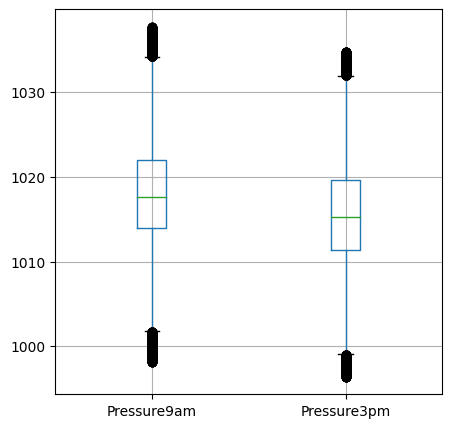

In [ ]:
# áp suất
num_col3 = ['Pressure9am', 'Pressure3pm']
# boxplot
plt.figure(figsize=(5, 5))
df.boxplot(num_col3)

<Axes: >

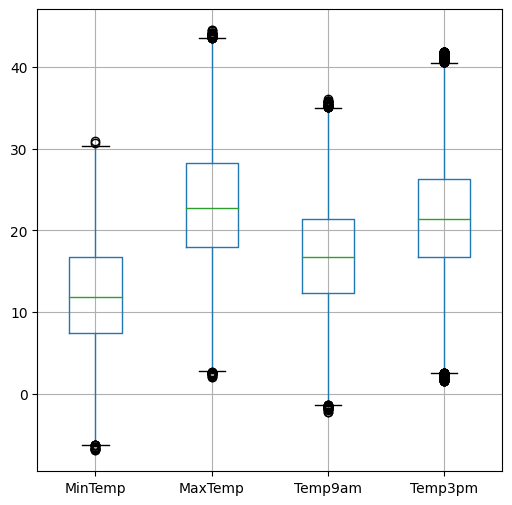

In [ ]:
# nhiệt độ
num_col4 = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']
# boxplot
plt.figure(figsize=(6, 6))
df.boxplot(num_col4)

<Axes: >

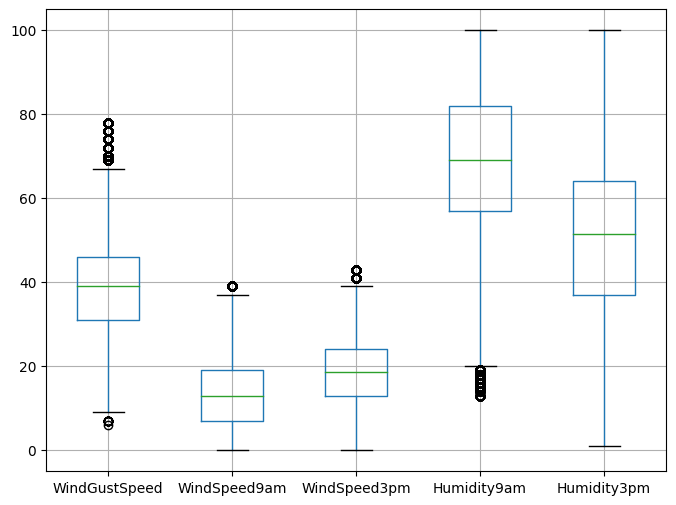

In [ ]:
# còn lại
remain_numcol = num_col1 + num_col2 + num_col3 + num_col4
num_col5 = [col for col in num_col if col not in remain_numcol]
# boxplot
plt.figure(figsize=(8, 6))
df.boxplot(num_col5)

In [ ]:
# sns.set(style='whitegrid')
# plt.figure(figsize=(10, 15))
# for i, col in enumerate(num_col, 1):
#     plt.subplot(8, 2, i)
#     sns.boxplot(x=df[col], color=sns.xkcd_rgb['light blue'])
#     plt.title(f'Boxplot {col} sau khi xóa')
# plt.tight_layout()
# plt.show()

Tuy đã sử dụng Phương pháp 3-sigma nhưng nhìn vào boxplot vẫn thấy còn một số giá trị outliers chưa được xử lý xong, nhóm thử nghiệm sử dụng Phương pháp khoảng tứ phân vị (Interquartile Range - IQR) để xử lý cho các cột còn nhiễu lên một df khác và đánh giá lại bằng độ tương quan.

Thử nghiệm sử dụng Tứ phân vị

In [ ]:
# tạo một dataframe mới để thử nghiệm
df_iqr = df.copy()

In [ ]:
# bỏ biến 'Humidity3pm' về boxplot đã hết outliers
remain_outliers_numcol = [col for col in num_col if col not in ['Humidity3pm']]
print(f'{len(remain_outliers_numcol)} biến: {remain_outliers_numcol}')

12 biến: ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [ ]:
for col in remain_outliers_numcol:
    Q1 = np.percentile(df_iqr[col], 25, interpolation='midpoint')
    Q3 = np.percentile(df_iqr[col], 75, interpolation='midpoint')
    IQR = Q3 - Q1
    lowerbound = Q1 - 1.5 * IQR
    upperbound = Q3 + 1.5 * IQR
    outliers_iqr = df_iqr[col][(df_iqr[col] < lowerbound) | (df_iqr[col] > upperbound)]
    index_outliers_col = list(outliers_iqr.index)
    df_iqr.drop(index_outliers_col, axis=0, inplace=True)

In [ ]:
print(f'Số dòng trước khi sử dụng IQR: {df.shape[0]}')
print(f'Số dòng sau khi sử dụng IQR: {df_iqr.shape[0]}')
print(f'Số dòng đã xóa khi thực hiện IQR: {df.shape[0]-df_iqr.shape[0]}',
      f'\nPhần trăm số dòng đã xóa: {((df.shape[0]-df_iqr.shape[0]) * 100 / df.shape[0]):.2f}%')

Số dòng trước khi sử dụng IQR: 134617
Số dòng sau khi sử dụng IQR: 84473
Số dòng đã xóa khi thực hiện IQR: 50144 
Phần trăm số dòng đã xóa: 37.25%


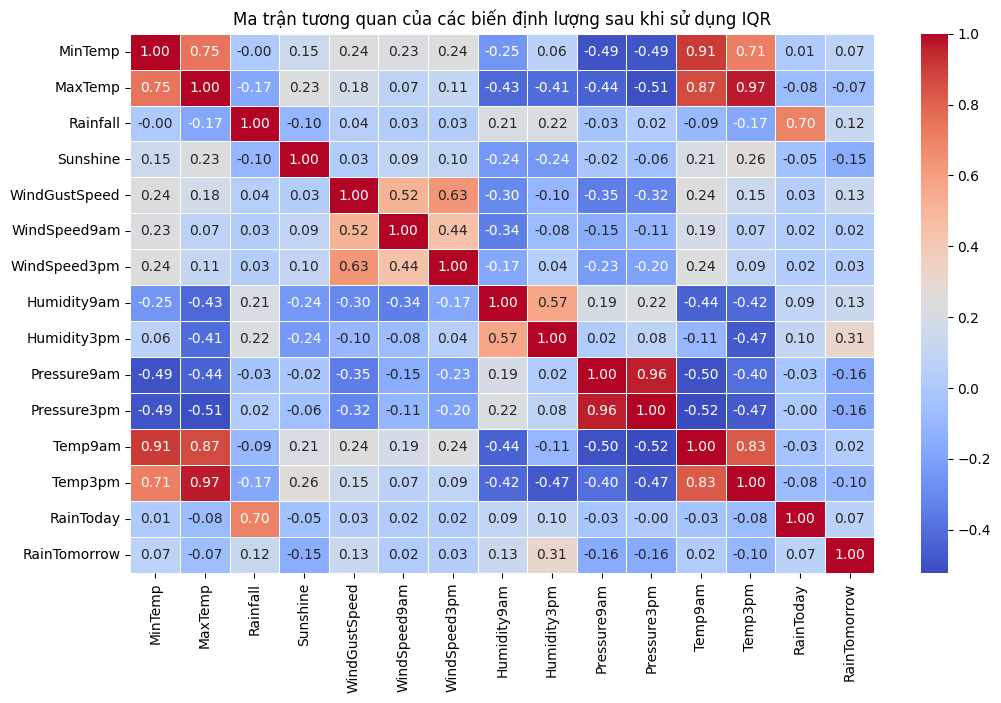

In [ ]:
# thực hiện vẽ bản đồ nhiệt kiểm tra tương quan
numeric_vars = num_col + ['RainToday', 'RainTomorrow']
numeric_data = df_iqr[numeric_vars]
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Ma trận tương quan của các biến định lượng sau khi sử dụng IQR')
plt.show()

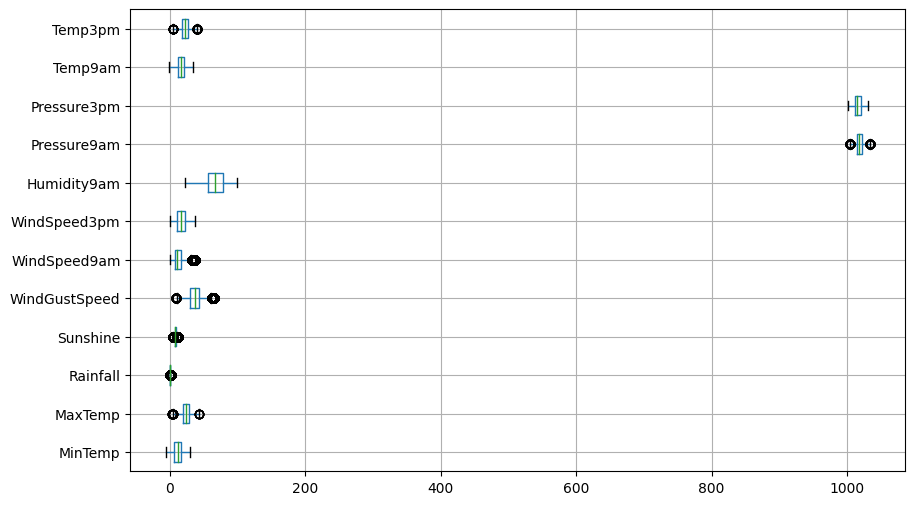

In [ ]:
plt.figure(figsize=(10, 6))
df_iqr.boxplot(column=remain_outliers_numcol, vert=False)
plt.show()

In [ ]:
# sns.set(style='whitegrid')
# plt.figure(figsize=(10, 15))
# for i, col in enumerate(num_col, 1):
#     plt.subplot(8, 2, i)
#     sns.boxplot(x=df_iqr[col], color=sns.xkcd_rgb['light grey'])
#     plt.title(f'Boxplot {col}')
# plt.tight_layout()
# plt.show()

##### 2.2.5. Xóa giá trị sai ràng buộc

In [ ]:
# lọc dòng có giá trị vượt ngưỡng ràng buộc
temp9am = df[(df['Temp9am'] < df['MinTemp']) | (df['Temp9am'] > df['MaxTemp'])]
temp3pm = df[(df['Temp3pm'] < df['MinTemp']) | (df['Temp3pm'] > df['MaxTemp'])]
incorrect_values = pd.concat([temp9am, temp3pm]).drop_duplicates()
col = ['Location', 'MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'RainToday']
incorrect_values[col]

,Location,MinTemp,MaxTemp,Temp9am,Temp3pm,RainToday
284,Albury,12.1864,18.8,8.700000,18.100000,0.0
612,Albury,12.1864,11.8,6.700000,11.300000,0.0
1566,Albury,10.0000,13.4,16.987509,12.300000,1.0
1686,Albury,12.1864,18.5,11.400000,17.800000,0.0
1932,Albury,8.2000,15.2,16.987509,14.800000,1.0
...,...,...,...,...,...,...
143847,Katherine,21.8000,34.6,28.200000,21.687235,0.0
144178,Uluru,21.4000,24.8,23.800000,17.700000,0.0
144203,Uluru,24.0000,30.4,25.400000,21.687235,0.0
145159,Uluru,14.2000,14.4,14.200000,14.000000,1.0


In [ ]:
# xóa các dòng lọc khỏi df
df = df.drop(incorrect_values.index)
print(f'Phần trăm số dòng đã xóa: {((incorrect_values.shape[0]) * 100 / df.shape[0]):.2f}%')

Phần trăm số dòng đã xóa: 2.03%


In [ ]:
value_check(df)

,Count,Unique,Null,%Null,DType
Date,131941,3432,0,0.00%,datetime64[ns]
Location,131941,49,0,0.00%,object
MinTemp,131941,371,0,0.00%,float64
MaxTemp,131941,424,0,0.00%,float64
Rainfall,131941,208,0,0.00%,float64
Evaporation,131941,343,0,0.00%,float64
Sunshine,131941,146,0,0.00%,float64
WindGustDir,131941,16,0,0.00%,object
WindGustSpeed,131941,41,0,0.00%,float64
WindDir9am,131941,16,0,0.00%,object


#### 2.3. ***Thu gọn dữ liệu (data reduction)***

In [ ]:
# Trả lại giá trị ban đầu cho 2 cột RainToday và RainTomorrow
df['RainToday'] = df['RainToday'].apply(lambda x: 'Yes' if x == 1 else 'No')
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 'Yes' if x == 1 else 'No')

##### 2.3.1. **PCA - Đối với các biến số Numeric**



In [ ]:
# Quan sát lại bộ dữ liệu
df_PMCA = df.copy()
df_PMCA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131941 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           131941 non-null  datetime64[ns]
 1   Location       131941 non-null  object        
 2   MinTemp        131941 non-null  float64       
 3   MaxTemp        131941 non-null  float64       
 4   Rainfall       131941 non-null  float64       
 5   Evaporation    131941 non-null  float64       
 6   Sunshine       131941 non-null  float64       
 7   WindGustDir    131941 non-null  object        
 8   WindGustSpeed  131941 non-null  float64       
 9   WindDir9am     131941 non-null  object        
 10  WindDir3pm     131941 non-null  object        
 11  WindSpeed9am   131941 non-null  float64       
 12  WindSpeed3pm   131941 non-null  float64       
 13  Humidity9am    131941 non-null  float64       
 14  Humidity3pm    131941 non-null  float64       
 15  

In [ ]:
numeric_variables = df_PMCA.select_dtypes(include=['float64'])
scaler = StandardScaler()
numeric_variables_scaled = scaler.fit_transform(numeric_variables)

# Áp dụng PCA
pca = PCA()
numeric_variables_pca = pca.fit_transform(numeric_variables_scaled)

# Lấy tỉ lệ phương sai tích lũy
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
nb_features = len(explained_variance_ratio)
points = np.cumsum(explained_variance_ratio) * 100
points = np.insert(points, 0, 0)
x_i = np.arange(0, nb_features + 1)
y_i = (points[-nb_features:]) // 0.01 / 100

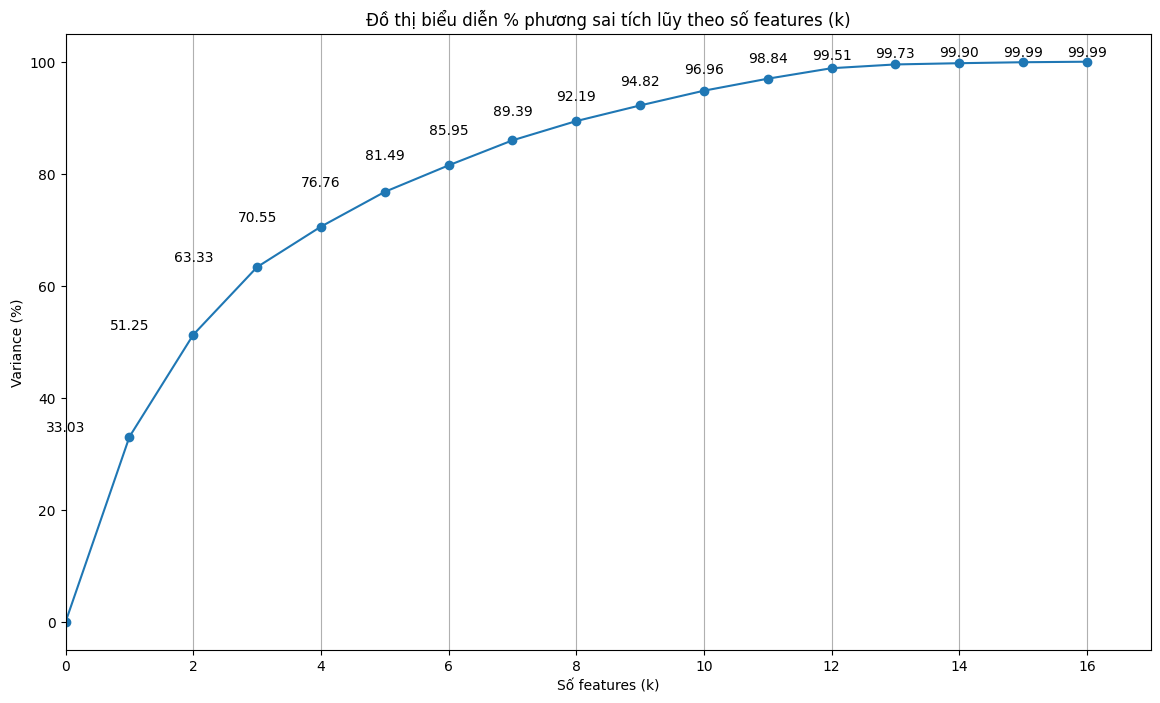

In [ ]:
plt.figure(figsize=(14, 8))
plt.plot(points, marker='o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis='x')
for i in x_i:
    index = min(i, len(y_i) - 1)
    plt.text(i, y_i[index] + 1, f'{y_i[index]:.2f}', ha='center', va='baseline')
plt.show()

In [ ]:
# Kiểm chứng: Tính phương sai tích lũy theo giá trị của k
var = 0.0
for k in range(1, nb_features + 1):
    pca = PCA(k)
    pca.fit(numeric_variables_scaled)

    new_var = pca.explained_variance_ratio_.sum() * 100
    print('   * k = %2d' % k, ': phương sai tích lũy ~ %.2f%%' % new_var,
          '--> tăng ~ %.2f%%' % (new_var - var))
    var = new_var

   * k =  1 : phương sai tích lũy ~ 33.03% --> tăng ~ 33.03%
   * k =  2 : phương sai tích lũy ~ 51.25% --> tăng ~ 18.22%
   * k =  3 : phương sai tích lũy ~ 63.33% --> tăng ~ 12.08%
   * k =  4 : phương sai tích lũy ~ 70.55% --> tăng ~ 7.22%
   * k =  5 : phương sai tích lũy ~ 76.76% --> tăng ~ 6.21%
   * k =  6 : phương sai tích lũy ~ 81.49% --> tăng ~ 4.73%
   * k =  7 : phương sai tích lũy ~ 85.96% --> tăng ~ 4.46%
   * k =  8 : phương sai tích lũy ~ 89.40% --> tăng ~ 3.44%
   * k =  9 : phương sai tích lũy ~ 92.19% --> tăng ~ 2.79%
   * k = 10 : phương sai tích lũy ~ 94.82% --> tăng ~ 2.63%
   * k = 11 : phương sai tích lũy ~ 96.97% --> tăng ~ 2.14%
   * k = 12 : phương sai tích lũy ~ 98.84% --> tăng ~ 1.87%
   * k = 13 : phương sai tích lũy ~ 99.51% --> tăng ~ 0.67%
   * k = 14 : phương sai tích lũy ~ 99.74% --> tăng ~ 0.22%
   * k = 15 : phương sai tích lũy ~ 99.91% --> tăng ~ 0.17%
   * k = 16 : phương sai tích lũy ~ 100.00% --> tăng ~ 0.09%


Dựa vào đồ thị và số liệu trên, áp dụng Phương pháp Elbow ta có thể lựa chọn số features trong khoảng [9, 12]

##### 2.3.2. **MCA - Đối với các biến định lượng Categorical**

In [ ]:
# Lọc ra các biến định danh (categorical variables)
categorical_variables = df_PMCA.select_dtypes(include=['object'])
categorical_variables

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
145454,Uluru,E,ESE,E,No,No
145455,Uluru,E,SE,ENE,No,No
145456,Uluru,NNW,SE,N,No,No
145457,Uluru,N,SE,WNW,No,No


In [ ]:
# Chọn các biến categorical
categorical_vars = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Tạo dataframe mới chỉ chứa các biến categorical
data_categorical = df_PMCA[categorical_vars]

# Chuyển đổi mảng thành DataFrame
data_categorical = pd.DataFrame(data_categorical)

# Thực hiện MCA
mca = MCA(n_components=5)
mca.fit(data_categorical)

# Tính tỷ lệ phương sai giải thích bởi từng thành phần chính
eigenvalues = mca.eigenvalues_
explained_variance_ratio = eigenvalues / sum(eigenvalues)

# Lấy tỉ lệ phương sai tích lũy
cumulative_variance = np.cumsum(explained_variance_ratio) * 100

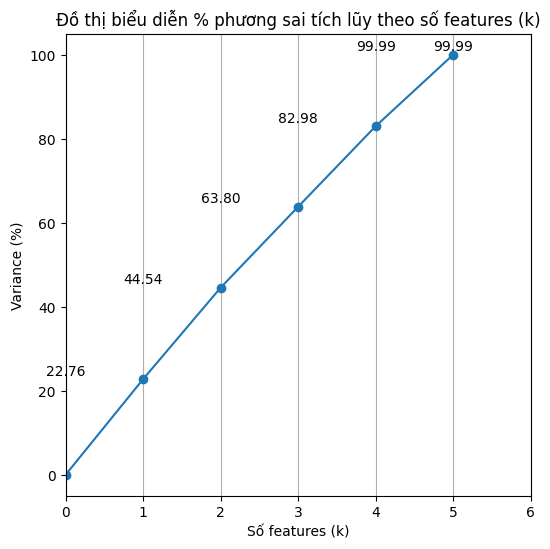

In [ ]:
# Vẽ đồ thị biểu diễn % phương sai tích lũy theo số features
nb_features = len(explained_variance_ratio)
points = np.cumsum(explained_variance_ratio) * 100
points = np.insert(points, 0, 0)
x_i = np.arange(0, nb_features + 1)
y_i = (points[-nb_features:]) // 0.01 / 100

plt.figure(figsize=(6, 6))
plt.plot(points, marker='o')
plt.xlabel('Số features (k)')
plt.ylabel('Variance (%)')
plt.title('Đồ thị biểu diễn % phương sai tích lũy theo số features (k)')
plt.xlim([0, nb_features + 1])
plt.grid(axis='x')
for i in x_i:
    index = min(i, len(y_i) - 1)
    plt.text(i, y_i[index] + 1, f"{y_i[index]:.2f}", ha='center', va='baseline')

plt.show()

In [ ]:
# Chọn các biến categorical
categorical_vars = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Tạo dataframe mới chỉ chứa các biến categorical
data_categorical = df_PMCA[categorical_vars]

# Thực hiện MCA
mca = MCA(n_components=data_categorical.shape[1])  # Chọn số thành phần chính bằng số features
mca.fit(data_categorical)

# Tính tỷ lệ phương sai giải thích bởi từng thành phần chính
eigenvalues = mca.eigenvalues_
explained_variance_ratio = eigenvalues / sum(eigenvalues)

# Lấy tỉ lệ phương sai tích lũy của từng k
cumulative_variance = np.cumsum(explained_variance_ratio)

# Tính gia tăng phần trăm phương sai khi k tăng lên
variance_increase = np.diff(cumulative_variance) * 100

# In kết quả
for k in range(1, len(cumulative_variance) + 1):
    print(f"  * k = {k} : phương sai tích lũy ~ {cumulative_variance[k-1]*100:.2f}% --> tăng ~ {variance_increase[k-2]:.2f}%")

  * k = 1 : phương sai tích lũy ~ 22.77% --> tăng ~ 17.02%
  * k = 2 : phương sai tích lũy ~ 44.54% --> tăng ~ 21.77%
  * k = 3 : phương sai tích lũy ~ 63.81% --> tăng ~ 19.27%
  * k = 4 : phương sai tích lũy ~ 82.98% --> tăng ~ 19.17%
  * k = 5 : phương sai tích lũy ~ 100.00% --> tăng ~ 17.02%


#### 2.4. ***Kết luận***

Kiểm tra lại

In [ ]:
# Thêm cột is_RainToday và is_RainTomorrow bằng phương pháp Label
df['is_RainToday'] = df['RainToday'].apply(lambda x: 1 if x == 'Yes' else 0).astype(float)
df['is_RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x == 'Yes' else 0).astype(float)

In [ ]:
value_check(df)

,Count,Unique,Null,%Null,DType
Date,131941,3432,0,0.00%,datetime64[ns]
Location,131941,49,0,0.00%,object
MinTemp,131941,371,0,0.00%,float64
MaxTemp,131941,424,0,0.00%,float64
Rainfall,131941,208,0,0.00%,float64
Evaporation,131941,343,0,0.00%,float64
Sunshine,131941,146,0,0.00%,float64
WindGustDir,131941,16,0,0.00%,object
WindGustSpeed,131941,41,0,0.00%,float64
WindDir9am,131941,16,0,0.00%,object


Ý tưởng là ta sẽ drop những cột có giá trị null quá lớn và không có sự ảnh hưởng nhiều đối với biến target. Và từ việc thực hiện PCA & MCA kết hợp với việc kiểm định, ta có thể đưa ra quyết định về việc giữ lại cả 4 biến categorical và 13/16 biến numerical ban đầu. Việc loại bỏ này sẽ không khiến bộ dữ liệu ban đầu bị mất đi quá nhiều giá trị thông tin, đồng thời việc bỏ 3 biến 'Evaporation', 'Cloud9am', 'Cloud3pm' có số lượng giá trị null > 30% sẽ mang lại sự ổn định hơn cho mô hình dự đoán sắp tới.

In [ ]:
# Loại bỏ 3 cột 'Evaporation', 'Cloud9am', 'Cloud3pm'
columns_to_remove = ['Evaporation', 'Cloud9am', 'Cloud3pm']
df = df.drop(columns=columns_to_remove)

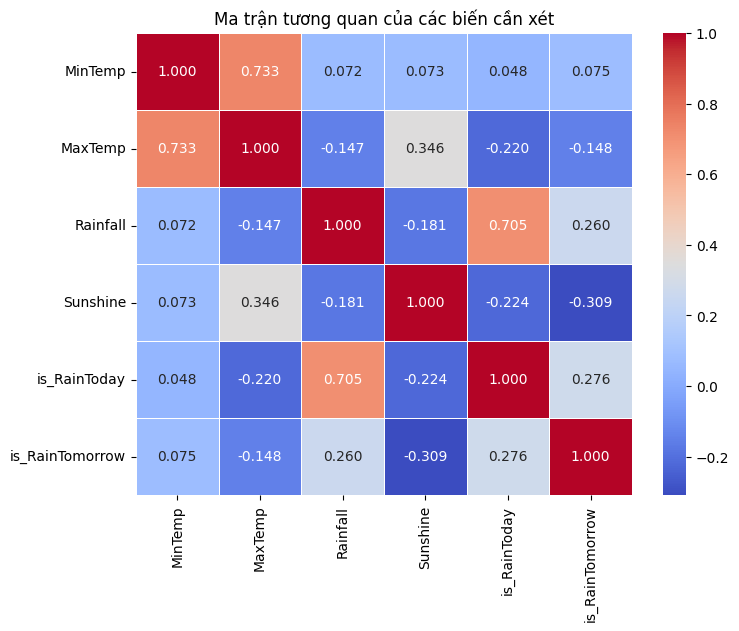

In [ ]:
# Chọn các biến dữ liệu số
numeric_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'is_RainToday', 'is_RainTomorrow']

# Tạo một DataFrame mới chỉ chứa các biến dữ liệu số
numeric_data = df[numeric_vars]

# Tính ma trận tương quan
correlation_matrix = numeric_data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.3f')
plt.title('Ma trận tương quan của các biến cần xét')
plt.show()

### 3. **Lưu file**

In [ ]:
df.to_csv(folder + '/weatherAUS_cleaned.csv', index = False)